 # To explore supervised machine learning
 
 ### Task : Predict score if a student study for 9.25 hrs in a day

In [1]:
# Importing essential libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
student_df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking for data types
student_df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# Checking correlation before model creation
student_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Scatterplot between Hours and Scores')

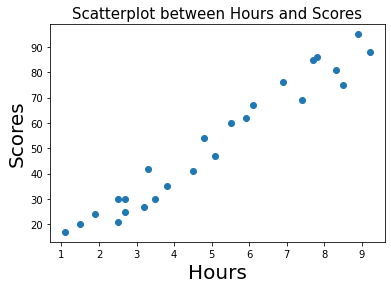

In [5]:
x=student_df['Hours']
y=student_df['Scores']
plt.scatter(x,y)

# Giving titles
plt.xlabel('Hours',size=20)
plt.ylabel('Scores',size=20)
plt.title('Scatterplot between Hours and Scores',size=15)

<AxesSubplot:title={'center':'Regplot between Hours and Scores'}, xlabel='Hours', ylabel='Scores'>

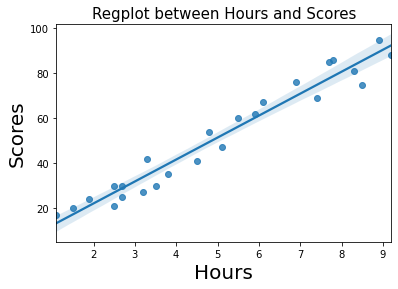

In [6]:
x = student_df['Hours']
y = student_df['Scores']

# Giving titles
plt.xlabel('Hours',size=20)
plt.ylabel('Scores',size=20)
plt.title("Regplot between Hours and Scores",size=15)
sns.regplot(x,y)

## Model Development

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
x = student_df[['Hours']]
y = student_df[['Scores']]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [8]:
model.fit(x_train,y_train)
predicted_score = model.predict(x_test)
predicted_score

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

## Checking model fit

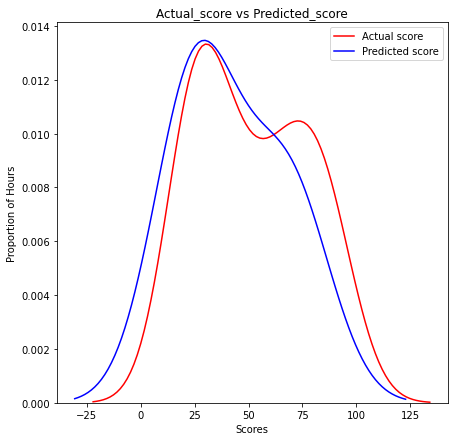

In [10]:
plt.figure(figsize=(7,7))

ax2 = sns.distplot(student_df['Scores'], hist=False, color="r", label="Actual score")
sns.distplot(predicted_score, hist=False, color="b", label="Predicted score", ax=ax2)

plt.title('Actual_score vs Predicted_score')
plt.xlabel('Scores')
plt.ylabel('Proportion of Hours')

plt.show()
plt.close()

## Predict score for 9.25 hours

In [13]:
hours = [[9.25]]
final_score = model.predict(hours)
print("No of Hours = 9.25")
print("Predicted Score = {}".format(final_score[0][0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


In [12]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,predicted_score)
print("The r^2 value is",accuracy)

The r^2 value is 0.9454906892105355


## Model evaluation

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predicted_score))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_score))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_score)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
